Формулируем условие последнего в полугодии ДЗ!

# Домашнее задание №5

## **Введение**

В данном практическом задании вы научитесь работать с данными scRNA-seq.

Мы анализируем scRNA-seq данные из статьи "[Single-cell mapping of the thymic stroma identifies IL-25-producing tuft epithelial cells](https://drive.google.com/file/d/1PozBU0cxuXQIQcKqGvgZ-6-bQ1wxwD-2/view?usp=sharing)".

## **Первая часть задания (6 баллов)**

1. На сайте github.com создаем **приватный** репозиторий и приводим ссылку на этот репозиторий в общей гугл-таблице ( **вкладка HW5** ) [https://docs.google.com/spreadsheets/d/1HItcZ\_5Z4ETo9M5MsVOE3gqNPdFEWLsyM6j1t09fwec/edit?usp=sharing](https://docs.google.com/spreadsheets/d/1HItcZ_5Z4ETo9M5MsVOE3gqNPdFEWLsyM6j1t09fwec/edit?usp=sharing)
  - Также необходимо открыть доступ для будущей проверки (Settings =\> Collaborators =\> Add people):

![](RackMultipart20231209-1-2akjfm_html_7563f38078fb9535.png)

2. **Образец Google Colab** ноутбука: [https://colab.research.google.com/drive/1yfLAlEsVlUdQVT5nSTrFtTyv\_rCLpLQD?usp=sharing](https://colab.research.google.com/drive/1yfLAlEsVlUdQVT5nSTrFtTyv_rCLpLQD?usp=sharing)
3. Получить count-матрицу объединением результатов разных экспериментов [https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103970](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103970)
4. Провести нормализацию данных (получаем значения TPM).
5. Построить heatmap для экспрессии маркерных генов.
6. Построить визуализацию данных по экспрессии на основе UMAP и PCA.
7. Проанализировать полученные результаты.

## **Вторая часть задания (2 балла)**

Сравнить уровни экспрессии генов, полученных по scRNA-seq (подгруппа mTEC-IV, где экспрессируется ген Aire) с классическим bulk RNA-seq для целого тимуса мыши из статьи [Meredith et al, 2015](https://pubmed.ncbi.nlm.nih.gov/26237550/). По данным bulk RNA-seq имеются 2 реплики - [SRR2038194](https://drive.google.com/file/d/1jDnstauvQvZsm_89saoUKTVykSicZPc2/view?usp=sharing) и [SRR2038195](https://drive.google.com/file/d/1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe/view?usp=sharing). Для сравнения с single cell данными имеет смысл сделать следующее:

1. Провести нормализацию bulk RNA-seq данных (получаем значения TPM).
2. Для каждого гена берем среднее значение TPM по двум репликам bulk RNA-seq
3. Для каждого гена берем среднее значение TPM по всем клеткам scRNA-seq (подгруппа mTEC-IV)
4. Подготовить подвыборку генов для анализа
  - Можно взять все маркерные гены из первой части задания
  - 100-200 наиболее высоко-экспрессированных генов как в bulk, так и scRNA (наибольшие значения TPM).
5. Для выбранного набора генов рисуем график с точками, где каждая точка это 1 ген, координаты -- это средняя экспрессия гена в bulk (ось OX) и средняя экспрессия в mTEC-IV (ось OY)
6. Сделать грубый вывод (примерную статистику) сколько генов имеют схожую экспрессию как в bulk, так и в scRNA, для скольки генов разница существенна.
  -. Это можно сделать "на глаз", а можно применить одну из процедур дифференциального анализа (например, DESeq-2). - **(2 балла)**

## **Список файлов для сдачи**

- В репозитории в файле _README_.md

- Ссылка на google colab ноутбук.
- Описание метода нормализации данных.
- Heatmap для экспрессии маркерных генов.
- Полученные визуализации UMAP и PCA.
- Анализ результатов.
- Результаты выполнения бонусного задания.

## **Форма отчетности**

Github репозиторий, содержащий все полученные результаты.

**Последний срок сдачи: воскресенье, 10 декабря до 23:59 (будет отслеживаться по последнему коммиту в репозиторий). Штраф -1 балл за каждый день просрочки.**

**В случае возникновения вопросов обращаться в telegram**

# Устанавливаем необходимые пакеты, производим импорт библиотек.
Вывод почистил, так как слишком его много..

In [ ]:
!pip3 install anndata
!pip3 install scanpy
!pip3 install matplotlib==3.1.3

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [ ]:
# Download CD45- EpCAM+ cells
gsm_list = [
    ('7017', '1395'),
    ('7018', '1396'),
    ('7019', '1398'),
    ('7020', '1458'),
    ('7021', '1459'),
    ('7022', '1539'),
    ('7023', '1540'),
    ('7024', '1541'),
    ('7025', '1542'),
    ('7026', '1544'),
    ('7027', '1545'),
    ('7028', '1546'),
    ('7029', '1646'),
    ('7030', '1647'),
    ('7031', '1648'),
    ('7032', '1649'),
    ('7033', '1751'),
    ('7034', '1753'),
    ('7035', '1792'),
    ('7036', '1793'),
    ('7037', '1795'),
]

for gsm, ab in gsm_list:
    link = f'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}_AB{ab}.txt.gz'
    !wget -c -nv $link
    file = f'GSM278{gsm}_AB{ab}.txt.gz'
    !gzip -f -d $file


2023-12-10 17:57:21 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017_AB1395.txt.gz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2023-12-10 17:57:21 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018_AB1396.txt.gz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2023-12-10 17:57:21 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019_AB1398.txt.gz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2023-12-10 17:57:21 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020_AB1458.txt.gz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2023-12-10 17:57:22 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021_AB1459.txt.gz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2023-12-10 17:57:22 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022_AB1539.txt.gz [348159/348159] -> "GSM2787022_AB1539.txt.

# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns (столбцов в два раза меньше..)

In [ ]:
import glob2
tmp = []

for name in glob2.glob('/content/*'):
    if str(name) == '/content/sample_data':
        continue
    tmp.append(pd.read_csv(str(name), sep='\t'))

counts = pd.concat(tmp, axis=1)
counts

,W340625,W340626,W340627,W340628,W340629,W340630,W340631,W340632,W340633,W340634,...,W378631,W378632,W378633,W378634,W378635,W378636,W378637,W378638,W378639,W378640
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




Собственно, отбираем клетки!

In [ ]:
# choose only cells from the provided file

id = pd.read_csv("https://drive.google.com/uc?id=1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G", sep="\t", index_col=0)
common_cells = set(counts.columns) & set(id.index)
counts = counts.loc[:, common_cells]
counts

<ipython-input-5-b0f177521ede>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  counts = counts.loc[:, common_cells]


,W416171,W378606,W431947,W340854,W378856,W340083,W291711,W378602,W378845,W314841,...,W379047,W314864,W292325,W291836,W416199,W340064,W378565,W340689,W379075,W291948
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,1,1,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,3,0,0,0,1,...,0,0,0,0,0,0,2,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

Переходим к нормализации:

In [ ]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).

counts_normalized = counts.divide(counts.sum(axis=0) / 1e+6, axis=1)
counts_normalized.loc['group', :] = id.T.loc['group', counts_normalized.columns]
counts_normalized.sort_values(by='group', axis=1, inplace=True)
counts_normalized

,W416171,W340275,W416193,W416138,W340669,W314966,W379137,W292026,W314958,W341106,...,W291702,W314850,W340779,W340060,W432001,W431341,W315041,W378641,W340128,W378575
0610005C13Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007C21Rik,0.0,0.0,0.0,605.326877,920.810313,0.0,108.119797,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007L01Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007P08Rik,0.0,0.0,0.0,0.0,0.0,110.754236,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007P14Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snoZ39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snoZ40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snosnR60_Z15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_normalized = counts_normalized.loc[markers, :].astype(float)
data_normalized

,W416171,W340275,W416193,W416138,W340669,W314966,W379137,W292026,W314958,W341106,...,W291702,W314850,W340779,W340060,W432001,W431341,W315041,W378641,W340128,W378575
Ctsl,0.000000,13227.513228,554.63117,605.326877,3683.241252,23147.635397,27029.949184,16586.409845,2042.900919,2738.05902,...,0.000000,692.041522,0.000000,0.000000,1626.01626,894.454383,487.804878,1798.561151,0.000000,0.000000
Psmb11,0.000000,0.000000,0.00000,0.000000,920.810313,2879.610145,1405.557358,4815.409310,1021.450460,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Prss16,859.845228,529.100529,0.00000,1210.653753,4604.051565,4208.660981,12541.896421,535.045479,1021.450460,304.22878,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Ascl1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sox4,859.845228,0.000000,554.63117,0.000000,0.000000,221.508473,0.000000,0.000000,1021.450460,1216.91512,...,0.000000,0.000000,0.000000,434.027778,0.00000,447.227191,487.804878,0.000000,0.000000,0.000000
Ccl21a,0.000000,5291.005291,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,692.041522,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apoe,0.000000,0.000000,554.63117,1210.653753,1841.620626,221.508473,216.239593,0.000000,0.000000,1825.37268,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,487.804878,0.000000,0.000000,461.041955
Ly6a,0.000000,0.000000,0.00000,4237.288136,920.810313,0.000000,108.119797,0.000000,0.000000,1825.37268,...,0.000000,0.000000,0.000000,0.000000,0.00000,2236.135957,0.000000,0.000000,0.000000,0.000000
Ccl21c,0.000000,2116.402116,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,814.332248,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Aire,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


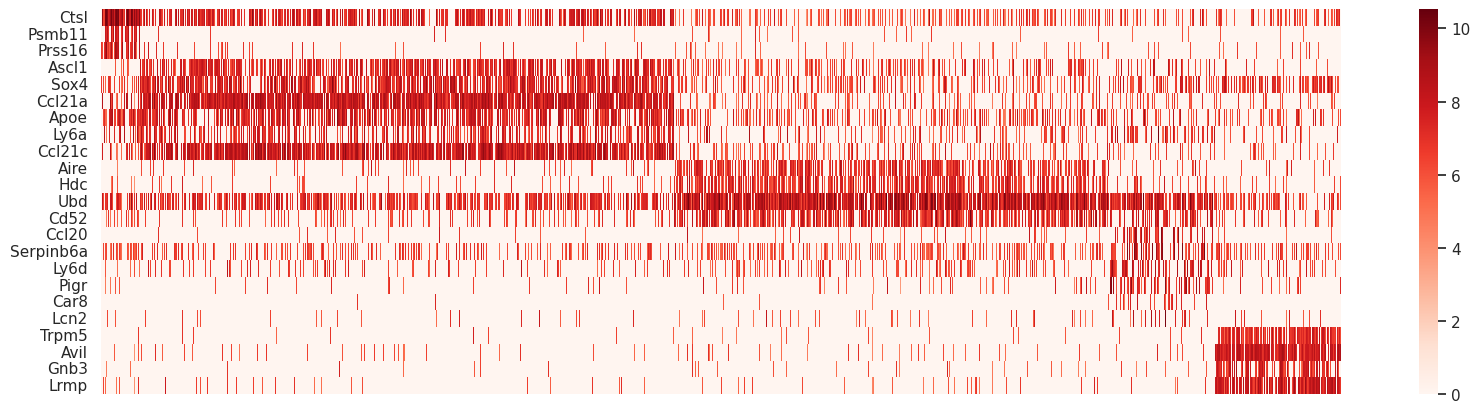

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(data_normalized + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [ ]:
# counts_norm(counts_normalized) - normalized data

adata = ad.AnnData(counts_normalized.drop(index='group').T)
sc.pp.log1p(adata)
# adata.var_names = list(counts_norm.index)
# adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

In [ ]:
# add to metadata cell type provided by authors

cells_type_data = counts_normalized.loc['group', :]

In [ ]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_type_data

In [ ]:
sc.pp.pca(adata, n_comps=50)

In [ ]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

<ipython-input-17-06ed9cd57294>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(ListedColormap(colors))


Список с названиями я не делал, поэтому из визуализации убрал часть
```
for i, c in enumerate(colors):
  print(f'{groups[i]} - {c}')
```

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


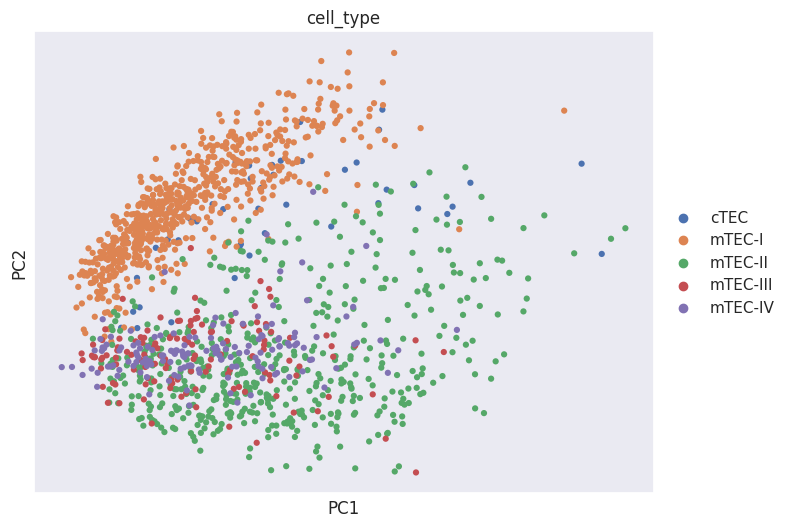

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


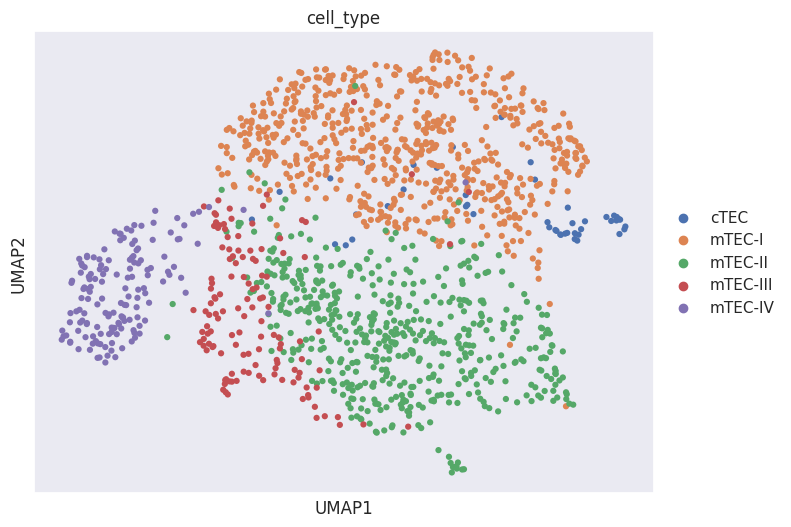

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()

# Бонусная часть

Скачиваем bulk RNA-seq данные реплик SRR2038194 и SRR2038195, после чего засовываем их в таблицу

In [ ]:
!gdown 1jDnstauvQvZsm_89saoUKTVykSicZPc2
!gdown 1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe

Downloading...
From: https://drive.google.com/uc?id=1jDnstauvQvZsm_89saoUKTVykSicZPc2
To: /content/SRR2038194.gene_name.counts
100% 585k/585k [00:00<00:00, 23.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
To: /content/SRR2038195.gene_name.counts
100% 590k/590k [00:00<00:00, 23.0MB/s]


In [ ]:
r1 = pd.read_csv("SRR2038194.gene_name.counts", sep="\t", index_col=0)
r2 = pd.read_csv("SRR2038195.gene_name.counts", sep="\t", index_col=0)
print(r1, r2, sep='\n\n')

            3767
Gnai3           
Pbsn           0
Cdc45        281
H19          640
Scml2         58
Apoh         141
...          ...
AC156032.1     1
BX681418.1     0
AL606917.1     0
CT485612.1     1
AC158307.1     0

[55290 rows x 1 columns]

            4966
Gnai3           
Pbsn           4
Cdc45        392
H19         1220
Scml2         85
Apoh         153
...          ...
AC156032.1     2
BX681418.1     0
AL606917.1     3
CT485612.1     0
AC158307.1     0

[55290 rows x 1 columns]


Сразу нормализуем данные:

In [ ]:
r1_normalized = r1.divide(r1.sum() / 1e+6)
r2_normalized = r2.divide(r2.sum() / 1e+6)
print(r1_normalized, r2_normalized, end='\n\n')

                 3767
Gnai3                
Pbsn         0.000000
Cdc45       12.633080
H19         28.772851
Scml2        2.607540
Apoh         6.339019
...               ...
AC156032.1   0.044958
BX681418.1   0.000000
AL606917.1   0.000000
CT485612.1   0.044958
AC158307.1   0.000000

[55290 rows x 1 columns]                  4966
Gnai3                
Pbsn         0.124393
Cdc45       12.190499
H19         37.939819
Scml2        2.643348
Apoh         4.758027
...               ...
AC156032.1   0.062196
BX681418.1   0.000000
AL606917.1   0.093295
CT485612.1   0.000000
AC158307.1   0.000000

[55290 rows x 1 columns]



In [ ]:
# Теперь берем среднее значение TPM по двум репликам
mean_value = [
    (name, (r1_normalized.loc[name, "3767"] + r2_normalized.loc[name, "4966"]) / 2)
     for name in (set(r1_normalized.index) & set(r2_normalized.index))
    ]
bulk = pd.Series(dict(mean_value))
bulk

Gm23760     0.000000
Ccdc117    23.219290
Ppy        23.402841
Gm5390      0.053577
Gm35570     0.015549
             ...    
Gm26313     0.015549
Gm30108     0.084675
Gm43216     0.031098
Gm50119     0.000000
Gm19184     0.000000
Length: 55290, dtype: float64

In [ ]:
# А теперь среднее значение берем по всем клеткам. Пользуемся нормализованными результатами из основной части!
scRNA = counts_normalized.loc[:, counts_normalized.loc['group', :] == "mTEC-IV"].drop(index='group').mean(axis=1)
scRNA

0610005C13Rik     0.000000
0610007C21Rik    30.192320
0610007L01Rik    51.624569
0610007P08Rik     8.036581
0610007P14Rik    46.598275
                   ...    
snoZ159           0.000000
snoZ178           0.000000
snoZ39            5.070840
snoZ40            0.000000
snosnR60_Z15      0.000000
Length: 34016, dtype: float64

Теперь можно перейти к сравнению уровня экспрессии генов!

In [ ]:
# Берем все маркерные гены
mark = scRNA.index & bulk.index & markers

<ipython-input-34-decc17e8c55d>:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  mark = scRNA.index & bulk.index & markers


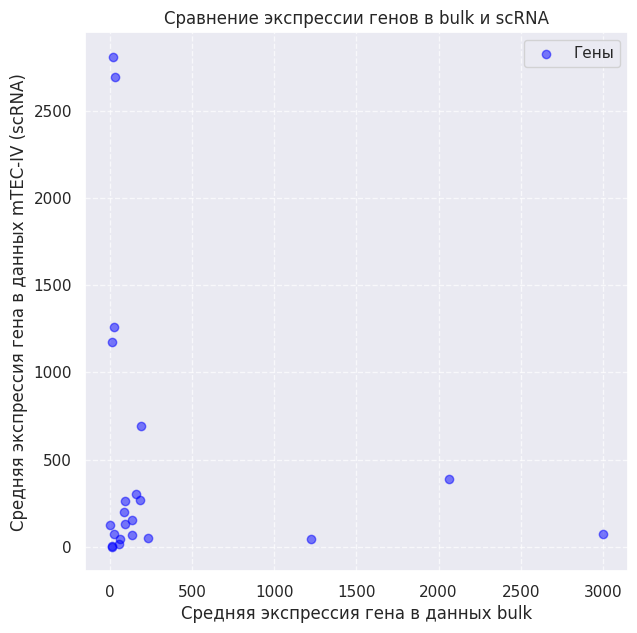

In [ ]:
# Создаем график для визуализации средней экспрессии выбранного набора генов в данных bulk и scRNA
# Каждая точка на графике представляет один ген

# Устанавливаем размер графика
plt.figure(figsize=(7, 7))

# Используем значения из DataFrame bulk для оси X (средняя экспрессия гена в данных bulk)
# и значения из Series scRNA для оси Y (средняя экспрессия гена в данных scRNA)
x_values = bulk[mark].values
y_values = scRNA[mark].values

# Строим точечный график
plt.scatter(x=x_values, y=y_values, label='Гены', color='blue', alpha=0.5)

# Подписываем оси и добавляем заголовок для лучшей визуализации
plt.xlabel("Средняя экспрессия гена в данных bulk")
plt.ylabel("Средняя экспрессия гена в данных mTEC-IV (scRNA)")
plt.title("Сравнение экспрессии генов в bulk и scRNA")

# Добавляем сетку для лучшей ориентации
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем легенду
plt.legend()

# Time to show
plt.show()


## Получается, что 13/22 ~ **0.6** имеют схожую экспрессию, hm, good!?

Чтобы понять уровень экспресси с классическим bulk RNA-seq для целого тимуса мыши из статьи **Meredith et al, 2015**, возьмем 150 генов с наибольшими значениями TPM (то есть набиольшая экспрессия в bulk и scRNA)

In [ ]:
mark = (set(bulk.nlargest(100).index) | set(scRNA.nlargest(100))) & set(bulk.index) & set(scRNA.index)

<ipython-input-42-57cbb38f2fa6>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_values = bulk[mark].values
<ipython-input-42-57cbb38f2fa6>:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y_values = scRNA[mark].values


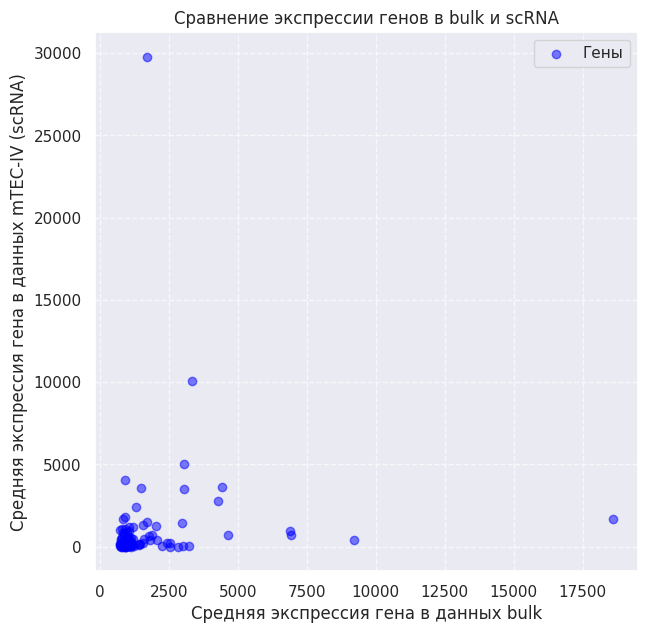

In [ ]:
# Создаем график для визуализации средней экспрессии выбранного набора генов в данных bulk и scRNA
# Каждая точка на графике представляет один ген

# Устанавливаем размер графика
plt.figure(figsize=(7, 7))

# Используем значения из DataFrame bulk для оси X (средняя экспрессия гена в данных bulk)
# и значения из Series scRNA для оси Y (средняя экспрессия гена в данных scRNA)
x_values = bulk[mark].values
y_values = scRNA[mark].values

# Строим точечный график
plt.scatter(x=x_values, y=y_values, label='Гены', color='blue', alpha=0.5)

# Подписываем оси и добавляем заголовок для лучшей визуализации
plt.xlabel("Средняя экспрессия гена в данных bulk")
plt.ylabel("Средняя экспрессия гена в данных mTEC-IV (scRNA)")
plt.title("Сравнение экспрессии генов в bulk и scRNA")

# Добавляем сетку для лучшей ориентации
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем легенду
plt.legend()

# Time to show
plt.show()


## Визуально большая часть находится в нижней левой части, но наверняка сказать про количество генов, имеющих схожую эскпрессию трудновато..
## Пусть их будет половина ~ **0.5**

При помощи DESeq-2 оценить не успеваю(
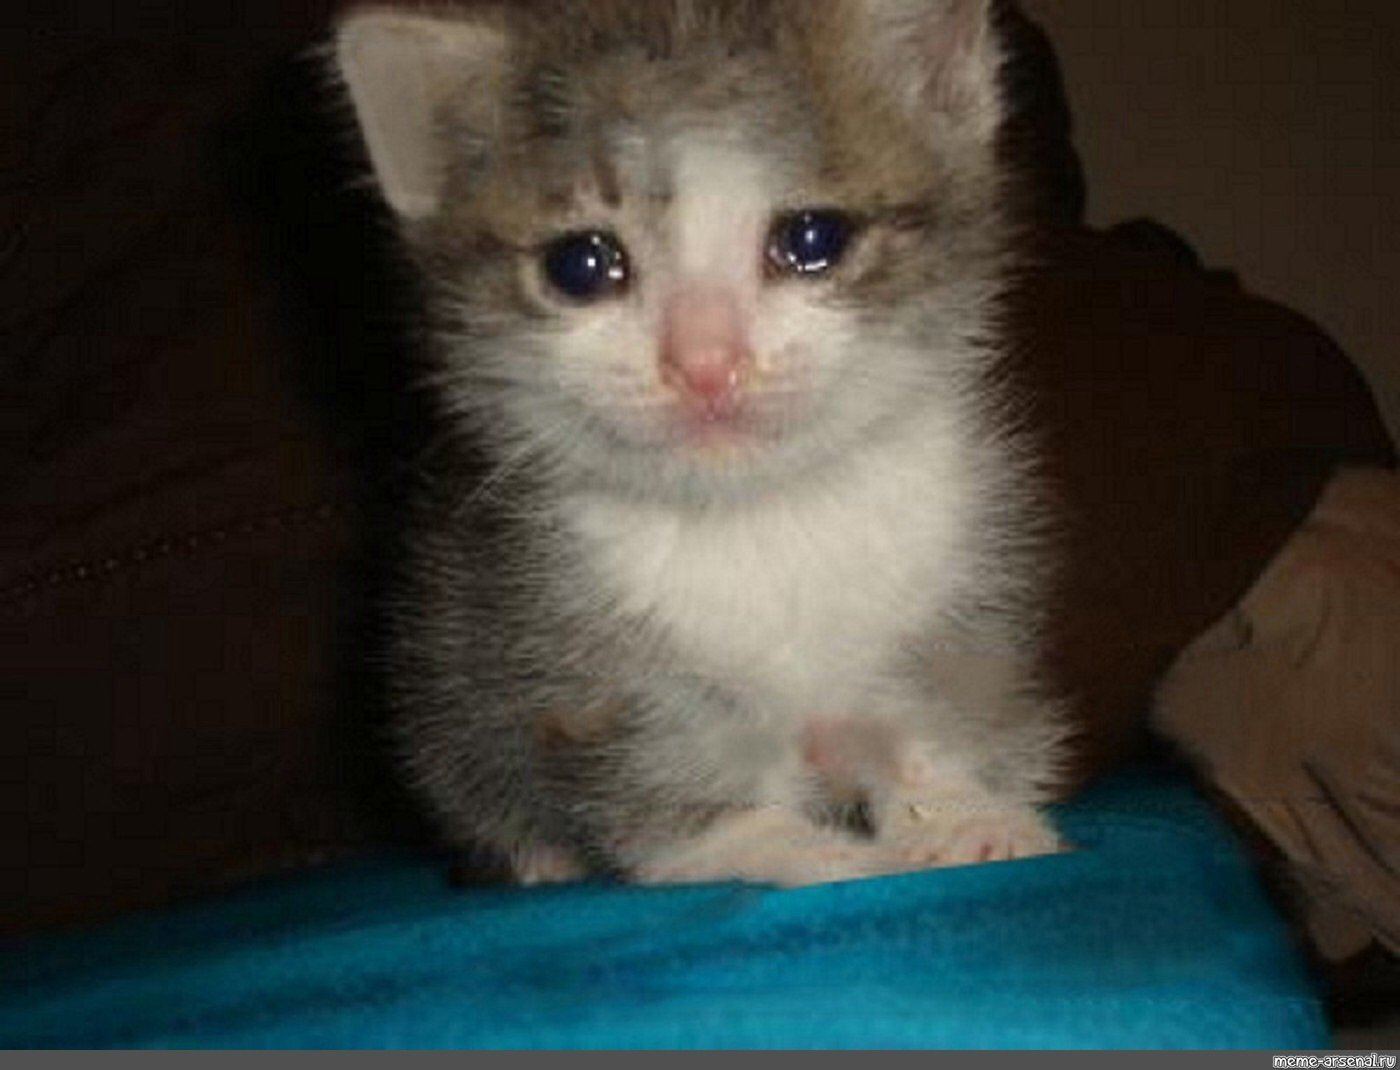